# Introduction 
####(Including goals, methodology, and questions)
The goal of this project is to find out how species and animals in four American National Parks are distributed and conserved. 
This project will scope, analyze, prepare and visualize data, as well as explain the findings from the analysis and visualizations. 
The questions we seek to answer are:
1. What are the conservation status of the species in the four national parks?
2. Is there a significant difference between the conservation status of the species?  
4. Which animals are most often sighted in each park? 
5. Are there animals that generally need to be conserved the most? In which park are they conserved better/worst? 

**Data Sources**: 
observations.csv and species_info.csv, which are both provided by codecademy.com

## Scoping
(Motivation plus section introduction)
Knowing how national parks are conserving protected species parks inform conservation planning. This can be done by taking stock of the species in need of protection in these parks. The first section will introduce the data we base our analysis on, followed by a section that presents the counts of (conserved) species, null values, etc. The third section will clean the data and align the methods and analysis with the project goals. Conclusions from previous analyses will be given in the fourth section, while inadequacies of the study and future questions to probe will be addressed in the last section. 
### Project Goals
Define the audience and Questions
A data scientist with National Wildlife Conservation Council, I'm commissioned to investigate the conservation outcomes of four national parks. The results should be able to inform the conservation direction of the four parks.  

### Data
Explain the data in more details than in intro. 
The investigation will be based on two csvs.One is "species_info.csv', whose columns are category,scientific_name,common_names,conservation_status. In which category means "Class" in the biological classification. The other file, "observations", has scientific_name,park_name, and observations as columns. "Observations" here refer to sightings over the past seven days. 
### Analysis
In this section, we will use descriptive analysis and visualizations to understand the data. We'll also evaluate the statistic significance of the relationship between variables.  
The following analyses will be included:
1. distributions
2. counts
3. relationship between species
4. conservation status of species
5. observations of species in parks

### Evaluation
This address whether the questions have been answered. If not, how could data or methodologies be improved for them to be answered?

## Loading the data

In [1]:
import numpy as np
from scipy.stats import chi2_contingency#我本來寫 import scipy，下面用 chi2_contingency 時它就說認不得
import re
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

### Exploring the Data

In [2]:
observations=pd.read_csv('observations.csv')
species_info=pd.read_csv('species_info.csv')

observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
species_info.head()

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


#### species_info

In [4]:
species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [5]:
#conservation_status 用 head看不到實際資料，要回原始資料
print(species_info.shape)
print(observations.shape)

(5824, 4)
(23296, 3)


In [6]:
print(species_info.columns)
print("\n")

for column in list(species_info.columns):
    print(f"{column} nunique:\n{species_info[column].nunique()}\n")

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


category nunique:
7

scientific_name nunique:
5541

common_names nunique:
5504

conservation_status nunique:
4



In [7]:
species_info.groupby('category').scientific_name.size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
Name: scientific_name, dtype: int64

In [8]:
print(species_info['conservation_status'].value_counts())
#Deal with NaN
species_info['conservation_status'].isnull().sum()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64


5633

#### Observations


In [9]:
print(observations.columns)
print("\n")

for column in list(observations.columns):
    print(f"{column} nunique:\n{observations[column].nunique()}\n")
observations.info()

Index(['scientific_name', 'park_name', 'observations'], dtype='object')


scientific_name nunique:
5541

park_name nunique:
4

observations nunique:
304

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [10]:
print(observations['park_name'].unique())
print(observations['observations'].sum())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
3314739


### Analysis

#### species

In [38]:
species_info.fillna("No Interventions",inplace=True)
species_info.groupby(['conservation_status']).scientific_name.size()
(5633/len(species_info))*100

96.72046703296702

In [12]:
categoryConservation=species_info[species_info.conservation_status!='No Interventions']\
.groupby(['category','conservation_status']).scientific_name.size().unstack()
categoryConservation

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,1.0,NaN,4.0,2.0
Bird,4.0,3.0,72.0,NaN
Fish,3.0,NaN,4.0,4.0
Mammal,7.0,1.0,28.0,2.0
Nonvascular Plant,NaN,NaN,5.0,NaN
Reptile,NaN,NaN,5.0,NaN
Vascular Plant,1.0,NaN,43.0,2.0


Bivariate analyses are probably better represented by plots

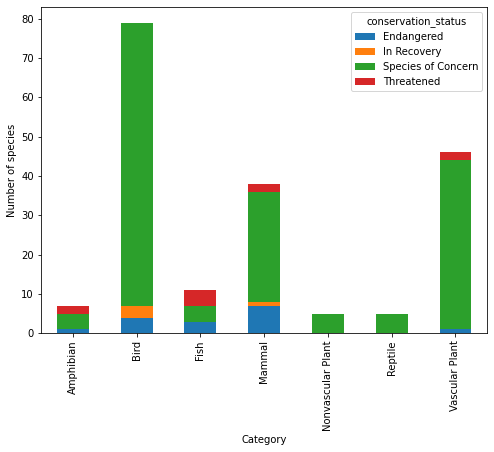

In [13]:
ax=categoryConservation.plot(kind='bar',figsize=(8,6),stacked=True)
ax.set_xlabel("Category")
ax.set_ylabel("Number of species")
plt.show()

#### Are some species better protected than others?

In [14]:
species_info['Is_Protected']=species_info.apply\
(lambda row:True if row['conservation_status']!='No Interventions' else False,axis=1)

#正解：species['is_protected'] = species.conservation_status != 'No Intervention'
species_info.head()

,category,scientific_name,common_names,conservation_status,Is_Protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Interventions,False
1,Mammal,Bos bison,"American Bison, Bison",No Interventions,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Interventions,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Interventions,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Interventions,False


In [15]:
#Look at how each species is protected
# category_count=species_info.groupby(['category','Is_Protected']).scientific_name.count().unstack()
# print(category_count)

#Sample: Use pivot table to rename the columns
"""category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts"""
category_counts=species_info.groupby(['category','Is_Protected'])\
.scientific_name.count()\
.reset_index()\
.pivot(columns='Is_Protected',index='category',values='scientific_name')\
.reset_index()

category_counts.columns=['Category','Not Protected','Is Protected']
print(type(category_counts))
category_counts#9/26 我的數字和 CA 不同，來檢查一下

<class 'pandas.core.frame.DataFrame'>


,Category,Not Protected,Is Protected
0,Amphibian,73,7
1,Bird,442,79
2,Fish,116,11
3,Mammal,176,38
4,Nonvascular Plant,328,5
5,Reptile,74,5
6,Vascular Plant,4424,46


In [16]:
category_counts['percent_protected']\
=(category_counts['Is Protected']\
/(category_counts['Not Protected']+category_counts['Is Protected']))*100

category_counts

,Category,Not Protected,Is Protected,percent_protected
0,Amphibian,73,7,8.750000
1,Bird,442,79,15.163148
2,Fish,116,11,8.661417
3,Mammal,176,38,17.757009
4,Nonvascular Plant,328,5,1.501502
5,Reptile,74,5,6.329114
6,Vascular Plant,4424,46,1.029083


The above table seems to suggest different degrees of protection among categories.  Chi-square tests will verify whether the differences are staistically significant. 

In [17]:
#參考以下 chi-square code 
# heartfailure_crosstab = pd.crosstab(df['obesity'], \
# df['heart_failure'], margins=True, margins_name="subtotal")
# chi, p, dof, expected = chi2_contingency(heartfailure_crosstab)

category_protection_crosstab=pd.crosstab\
(category_counts['Category'],category_counts['percent_protected']\
 , margins=True, margins_name="subtotal")

chi,p,dof,expected=chi2_contingency(category_protection_crosstab)

#以上方式看不出哪兩個 category 有差，以下是 sample 的方法

print(category_counts)
#Amphibian and Bird
contingency_A_B=[[7,73],
                [79,442]]
chi,p,dof,expected=chi2_contingency(contingency_A_B)
print("Differences between mphibian and Bird are not statistically significant" )
#Mammal and Nonvascular Plant
contingency_M_N=[[38,176],
                [5,328]]
chi,p,dof,expected=chi2_contingency(contingency_M_N)
p
print("Differences between Mammal and  Nonvascular Plant  are statistically significant" )
#Mammal and Reptile
contingency_M_R=[[38,176],
                [74,5]]
chi,p,dof,expected=chi2_contingency(contingency_M_N)
p
print("Differences between Mammal and  Reptile  are statistically significant" )

            Category  Not Protected  Is Protected  percent_protected
0          Amphibian             73             7           8.750000
1               Bird            442            79          15.163148
2               Fish            116            11           8.661417
3             Mammal            176            38          17.757009
4  Nonvascular Plant            328             5           1.501502
5            Reptile             74             5           6.329114
6     Vascular Plant           4424            46           1.029083
Differences between mphibian and Bird are not statistically significant
Differences between Mammal and  Nonvascular Plant  are statistically significant
Differences between Mammal and  Reptile  are statistically significant


#### Look at the observation data

This section will address which animals are more prevalent in the parks. But I am not sure why only mammals are considered. I'll check which category has the most observations first.And identify the most prevalent animal of that category. 



In [18]:
species_observations=species_info.merge(observations,how='outer')
species_observations.head()

,category,scientific_name,common_names,conservation_status,Is_Protected,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Interventions,False,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Interventions,False,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Interventions,False,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Interventions,False,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",No Interventions,False,Yosemite National Park,128


In [19]:
species_observations_groupedby_category=species_observations.groupby('category')\
.sum()
species_observations_groupedby_category

,Is_Protected,observations
category,,
Amphibian,28,45068
Bird,348,332371
Fish,48,72901
Mammal,232,163120
Nonvascular Plant,20,190653
Reptile,20,45822
Vascular Plant,184,2795312


While birds and nonvascular plants have more sightings, the most seen "animal" are mammals. Hence, it's assumed that the most prevalent animal should be a mammal.

Since the primary audience are conservation professionals, I think I should discuss species in terms of their scientific names.As far as I know, the first part of the scientific name represents "genus" and plays a fundamental part in the naming system. 

**But using the common names provides more opportunities for practicing string manipulation**, so I'll stick with it. 

In [20]:
#Remove punctuation
import string

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation, "")
    return text

"""def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text"""

"def remove_punctuations(text):\n    for punctuation in string.punctuation:\n        text = text.replace(punctuation, '')\n    return text"

In [21]:
mammal_common_names_no_punct=\
species_info[species_info.category=='Mammal']\
.common_names\
.apply(remove_punctuation)\
.str\
.split()\
.to_list()

#The ".str\.split\.to_list()" part comes from the sample. 
#Actually I dont' understand why "to_list()" would turn each cell in the column into a list

"""common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)"""

mammal_common_names_no_punct
type(mammal_common_names_no_punct)

list

In [22]:
#Then, identify and remove duplicates within each nested list
no_duplicates_mammal_common_names=[]
for item in mammal_common_names_no_punct:
    item=list(dict.fromkeys(item))
    no_duplicates_mammal_common_names.append(item)
no_duplicates_mammal_common_names[:6]    

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [23]:
name_key_word_list=[]
kw_count=[]
count=0

for item in no_duplicates_mammal_common_names:
    for subitem in item:
        name_key_word_list.append(subitem)
        
name_key_word_Series=pd.Series(name_key_word_list)     
print(name_key_word_Series.head())
name_key_word_Series.value_counts()

0      Gappers
1    RedBacked
2         Vole
3     American
4        Bison
dtype: object


Bat            23
Shrew          18
Myotis         17
Mouse          16
Chipmunk       13
               ..
House           1
Stones          1
WhiteFooted     1
Cotton          1
BroadFooted     1
Length: 204, dtype: int64

#### Identify the species that are bats

In [24]:
# species_observations['Is_Bat']=species_observations\
# [species_observations.common_names.str.contains('\bbat\b')]
# species_observations.head()

#Sample:
# species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

species_observations['Is_Bat']=species_observations.common_names.str.contains(r'\bBat\b',regex=True)
species_observations.head(10)

,category,scientific_name,common_names,conservation_status,Is_Protected,park_name,observations,Is_Bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Interventions,False,Bryce National Park,130,False
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Interventions,False,Yellowstone National Park,270,False
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Interventions,False,Great Smoky Mountains National Park,98,False
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Interventions,False,Yosemite National Park,117,False
4,Mammal,Bos bison,"American Bison, Bison",No Interventions,False,Yosemite National Park,128,False
5,Mammal,Bos bison,"American Bison, Bison",No Interventions,False,Yellowstone National Park,269,False
6,Mammal,Bos bison,"American Bison, Bison",No Interventions,False,Bryce National Park,68,False
7,Mammal,Bos bison,"American Bison, Bison",No Interventions,False,Great Smoky Mountains National Park,77,False
8,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Interventions,False,Bryce National Park,99,False
9,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Interventions,False,Yosemite National Park,124,False


In [42]:
Is_Bat_df=species_observations[species_observations.Is_Bat==True]
Is_Bat_df=Is_Bat_df[['category','common_names','Is_Protected','park_name','observations']]
Is_Bat_df.observations.sum()
Not_Bat_df=species_observations[species_observations.Is_Bat==False]

In [36]:
#Are there more of them protected than not protected (better so)? Find out the condition of each park. 
Is_Bat_grouped_by_park_and_protection_state\
=Is_Bat_df.groupby(['park_name','Is_Protected']).observations.sum().unstack()

Is_Bat_grouped_by_park_and_protection_state.columns=['Not-Protected','Protected']
Is_Bat_grouped_by_park_and_protection_state['Percent Protected']\
=(Is_Bat_grouped_by_park_and_protection_state.Protected\
/(Is_Bat_grouped_by_park_and_protection_state.Protected\
  +Is_Bat_grouped_by_park_and_protection_state['Not-Protected']))*100

Is_Bat_grouped_by_park_and_protection_state.head()

,Not-Protected,Protected,Percent Protected
park_name,,,
Bryce National Park,1596,1837,53.510050
Great Smoky Mountains National Park,1299,1112,46.121941
Yellowstone National Park,4044,4318,51.638364
Yosemite National Park,2345,2441,51.002925


### Conclusions
Below are the answers to the questions:

1. What are the conservation status of the species in the four national parks?
A majority of 96.7% of the species receive no conservation interventions. Among the conserved, mammals are the largest category. 

2. Is there a significant difference between the conservation status of the species?
Regarding animal species, mammals are better protected than reptiles to a significant degree. Animals and plants combined, mammals are better protected than vascular plants. 

3. Which animals are most often sighted in each park?
Bats are the most various animal in the parks, with 23 kinds recorded (in terms of common names, not scientific names). 

4. Are there animals that generally need to be conserved the most? In which park are they conserved better/worst?
Bryce National Park has the highest percent of protected bat species, at 54% , while over half of bat species in the Great Smoky Mountains National Park do not need conservation interventions. 

## Futher Research 

The below is copied from the sample. It's based on some common sense and domain knoledge that I lack. 
"""This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered."""